In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# GROUP 6 
AALIYA SHAIKH (20070123084)

AROHI RATHOD (20070123072)

ENTC B 

# Preprocessing:

The Dataset we are going to be analysing includes the details of patients who have undergone surgery for breast cancer. This dataset set was collected between the years 1959 and 1979. It also tells us whether the patient survived or not, where the label "1" suggests that the patient lived for more that 5 years and the label "2" suggests that the patient died within 5 years

In [ ]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/haberman.csv")
df.shape

(306, 4)

In [ ]:
#checking for any duplicate values
duplicates = df[df.duplicated()] 
print(len(duplicates))


17


In [ ]:
#removing the duplicate values
data = pd.DataFrame(df)
data.drop_duplicates(subset=None, inplace=True)


In [ ]:
#displaying the top 5 datapoints
data.head()

,Age,Year,Node_num,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [ ]:
#displaying the last 5 datapoints
data.tail()

,Age,Year,Node_num,survival
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [ ]:
#displaying the number of rows and columns
print(data.shape)

(289, 4)


Thus, we have 289 rows and 4 columns.

In [ ]:
#print the headers of the columns 
print(data.columns)

Index(['Age', 'Year', 'Node_num', 'survival'], dtype='object')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 305
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Age       289 non-null    int64
 1   Year      289 non-null    int64
 2   Node_num  289 non-null    int64
 3   survival  289 non-null    int64
dtypes: int64(4)
memory usage: 11.3 KB


 Thus there are no null values present in the dataset, and it is ready to be analysed.

# Analysing the variation in the dependent and independent features:

The independent variables here are age,year and Node_num. Node_num is the number of axillary nodes present for a certain patient. Year is the year in which the patient has undergone surgery. Survival is the dependent variable which tells us whether the patient survived or not. Thus we have 2 classes, 1- patient has survived for more than 5 years(survived) and 2- patient died within 5 years(passed). The task at hand is find which features affect the surivial status and analyse the variations in them. This analysis will help us in making predictions for new patients and give us insight on which features should be considered while making these predictions.

Text(0.5, 1.0, 'Variation in age')

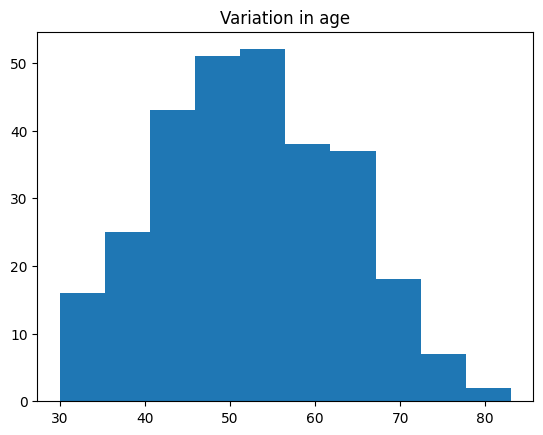

In [ ]:
plt.hist(data=data,x="Age")
plt.title("Variation in age")


From the above histogram, we can see that most patients are in the age group 40 to 55. Lower number of cases are reported for ages before 40 and ages above 55.

Text(0.5, 1.0, 'Variation in number of axillary nodes')

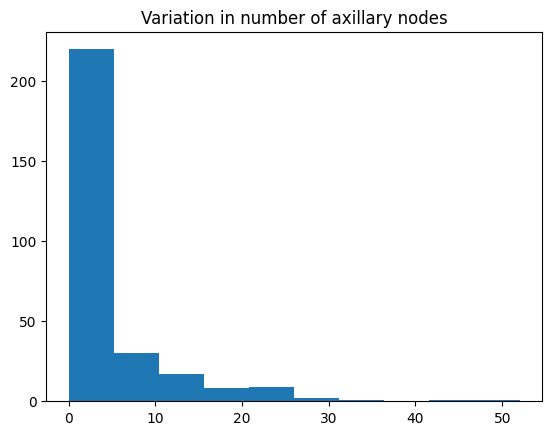

In [ ]:
plt.hist(data=data,x="Node_num")
plt.title("Variation in number of axillary nodes")

The above graph shows that most patients have 0 to 5 number of axillary nodes (more than 200). Very few patients have number of nodes between 5 to 10 (less than 50).Having more than 10 axillary nodes, is observed to be rare.

Text(0.5, 1.0, 'Variation in year')

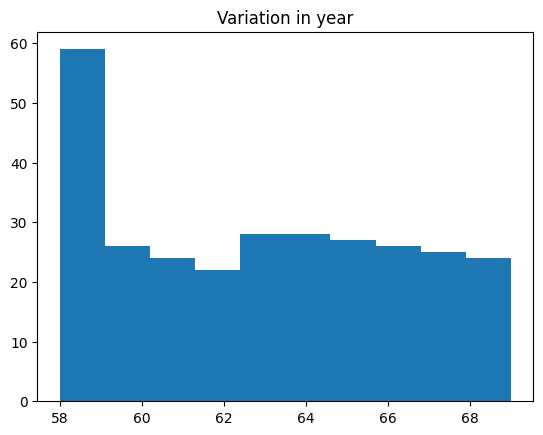

In [ ]:
plt.hist(data=data,x="Year")
plt.title("Variation in year")

The above graph shows that most operations were performed between 1958 and 1959. The number of operations were the least around 1961 and 1962. These variations could be because of the development in non invasive techniques

Text(0.5, 1.0, 'Variation in survival status')

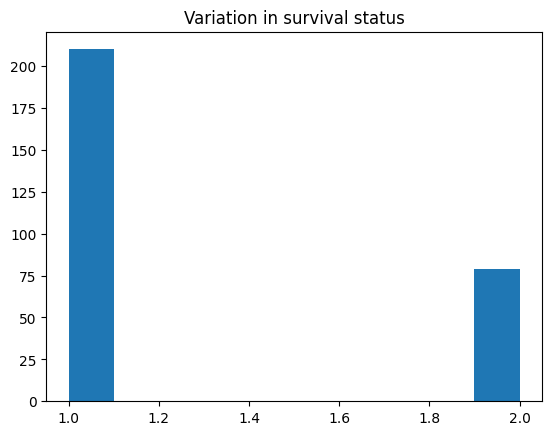

In [ ]:
plt.hist(data=data,x="survival")
plt.title("Variation in survival status")

The above graph shows that most patients have survived beyond 5 years

# Univariate Analysis 

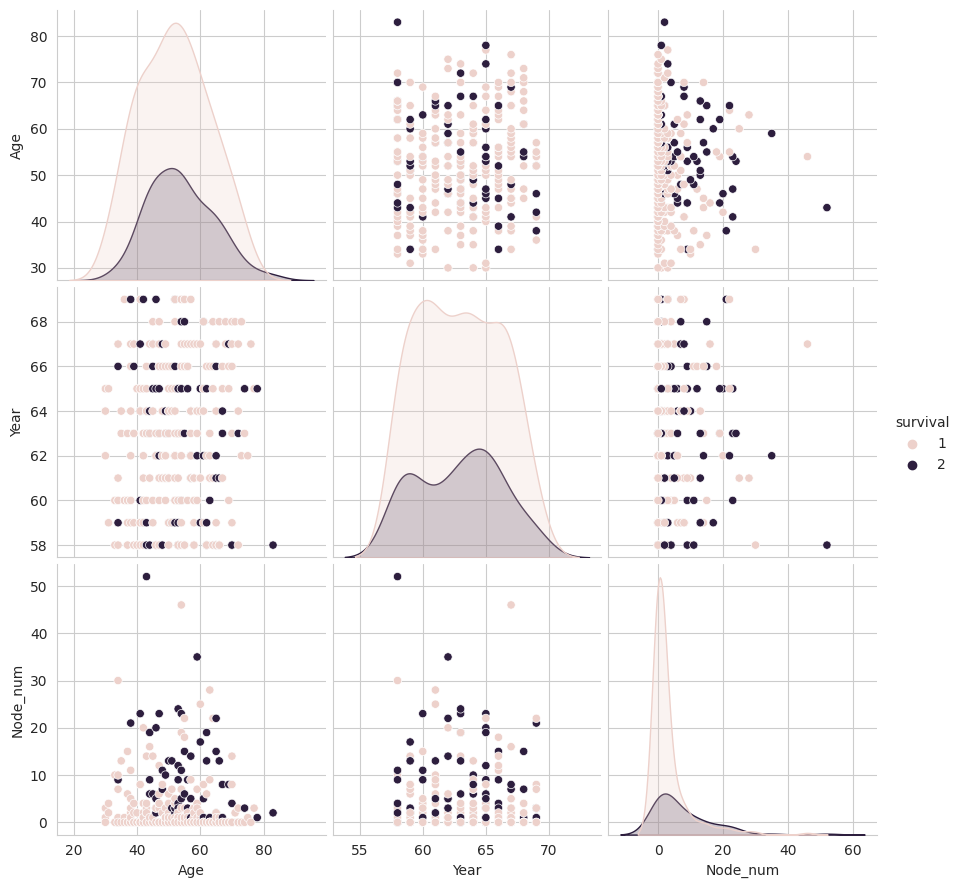

In [ ]:
plt.close()
sns.set_style("whitegrid");
sns.pairplot(data,hue="survival",height=3);
plt.show()

From the above analysis we can choose a feature for univariate analysis based on which feature gives a significant difference in distribution between the survived and died class. 
We can see that this difference in distribution is the most apparent for Node_num which is the number of axillary nodes present.
Hence, we are choosing Node_num for univariate analysis.

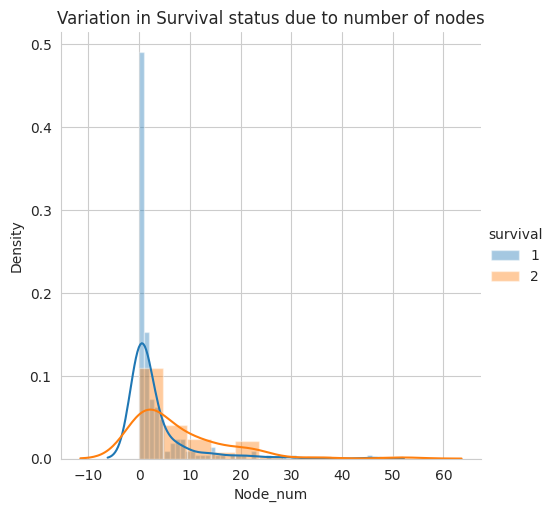

In [ ]:
sns.FacetGrid(data, hue="survival",height=5) \
.map(sns.distplot,"Node_num") \
.add_legend();
plt.title("Variation in Survival status due to number of nodes")
plt.show();

The above graph shows that most patients have that have undergone operation have been found to have 0 to 5 axillary nodes, and people who have fewer number of axillary nodes have more chances of survival.This proves that the number of axillary nodes is indeed an important feature in determining the survival status.

[0.76124567 0.10380623 0.05882353 0.02768166 0.03114187 0.00692042
 0.00346021 0.         0.00346021 0.00346021]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


Text(0.5, 1.0, 'CDF and PDF of Number of nodes')

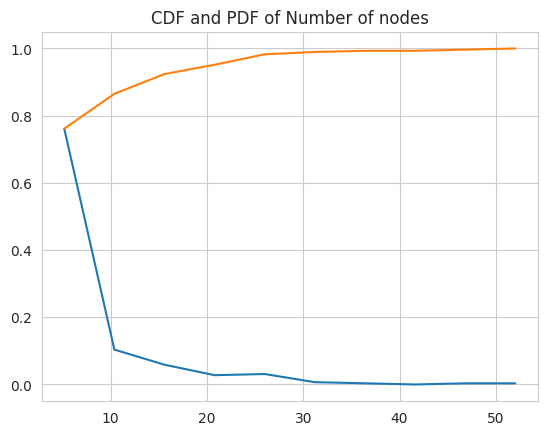

In [ ]:

counts, bin_edges = np.histogram(data["Node_num"], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.title("CDF and PDF of Number of nodes")


The above graph shows the variation in the number of nodes in the dataset, showing that most people have reported 0 to 5 number of nodes.

In [ ]:
survived = data[data['survival']==1]
passed=data[data['survival']==2]
print("means:")
print("mean number of nodes in people that survived is ",np.mean(survived["Node_num"]))
print("mean number of nodes in people that did not survive is",np.mean(passed["Node_num"]))
print("\n std dev:")
print("std dev for number of nodes in people that survived",np.std(survived["Node_num"]))
print("std dev for number of nodes in people that did not survive",np.std(passed["Node_num"]))

means:
mean number of nodes in people that survived is  2.9857142857142858
mean number of nodes in people that did not survive is 7.506329113924051

 std dev:
std dev for number of nodes in people that survived 6.0154393192917865
std dev for number of nodes in people that did not survive 9.19668820099755


<function matplotlib.pyplot.show(close=None, block=None)>

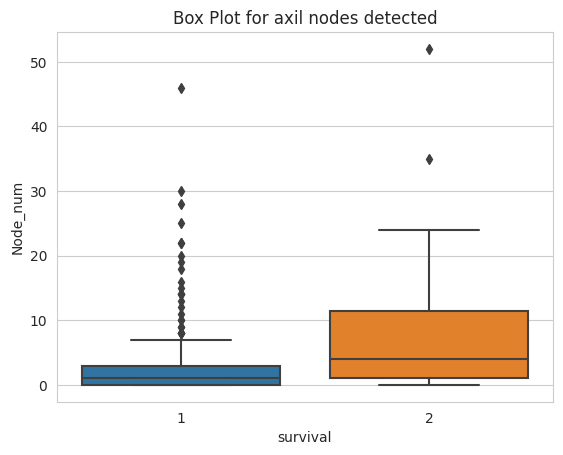

In [ ]:
sns.set_style("whitegrid")
sns.boxplot(data=data,x="survival",y="Node_num")
plt.title("Box Plot for axil nodes detected")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

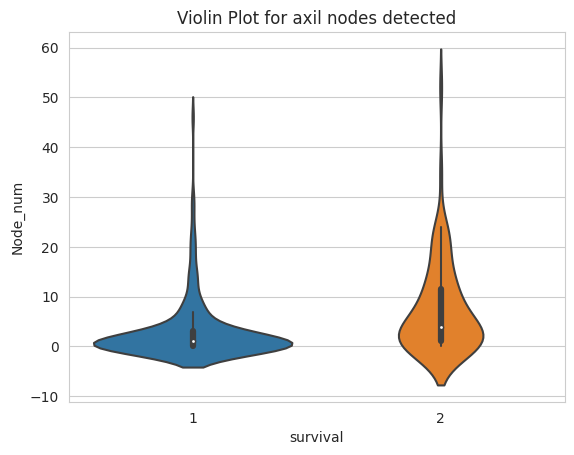

In [ ]:
sns.violinplot(x="survival",y="Node_num",data=data,size=8)
plt.title("Violin Plot for axil nodes detected")
plt.show

According to both plots, patients who lived longer than five years had, on average, fewer axil nodes found than those who did not.
With some patients having significantly more nodes found than others, the box plot demonstrates that there is a broader range of axil node counts among patients who did not survive longer than 5 years.
The violin plot provides a more in-depth look at how axil nodes are distributed, with the bigger area of the plot indicating that there are more patients with greater node counts. Additionally, it demonstrates that the distribution is more heavily weighted in favour of higher values for patients who did not live past five years.

# Bivariate analysis 

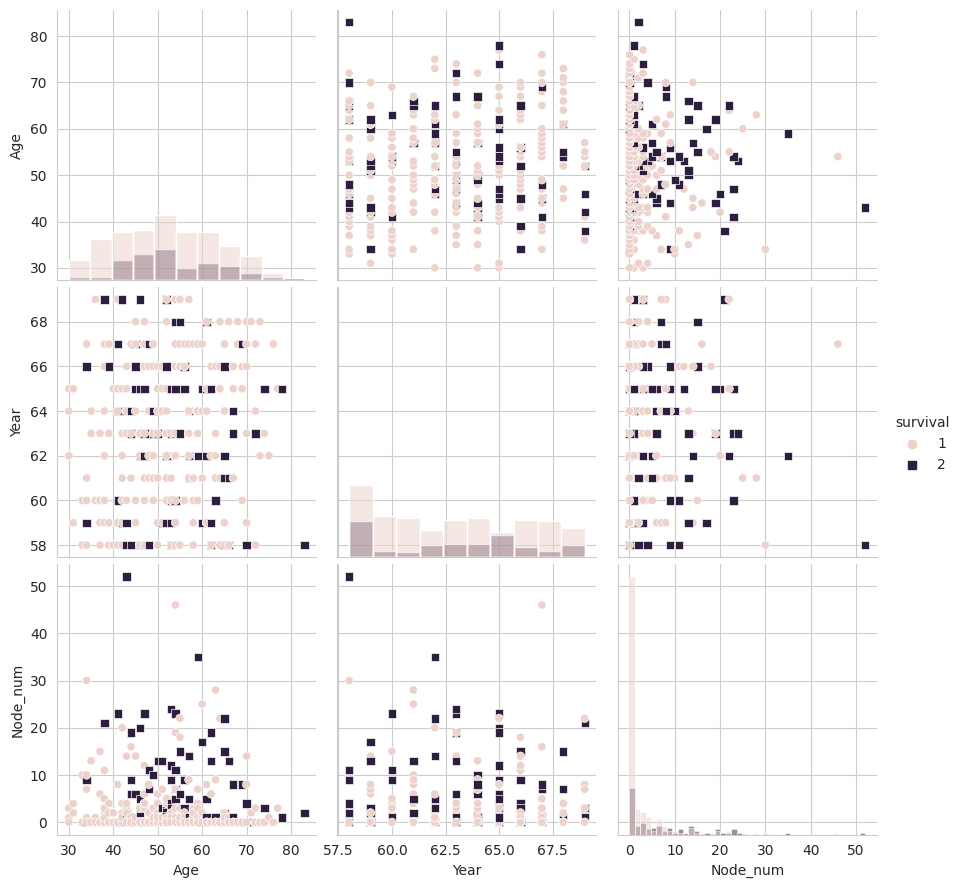

In [ ]:
sns.pairplot(df, hue="survival", diag_kind="hist", markers=["o", "s"], height=3)
plt.show()

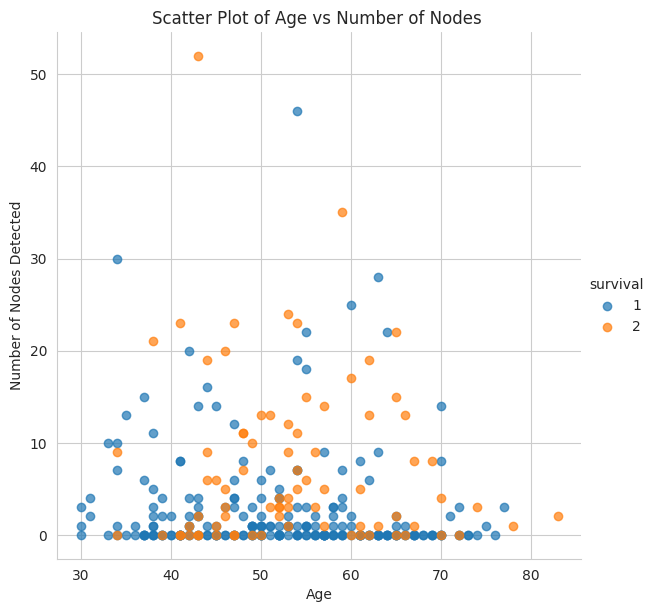

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="survival", height=6) \
   .map(plt.scatter, "Age", "Node_num", alpha=.7) \
   .add_legend()
plt.title("Scatter Plot of Age vs Number of Nodes ")
plt.xlabel("Age")
plt.ylabel("Number of Nodes Detected")
plt.show()

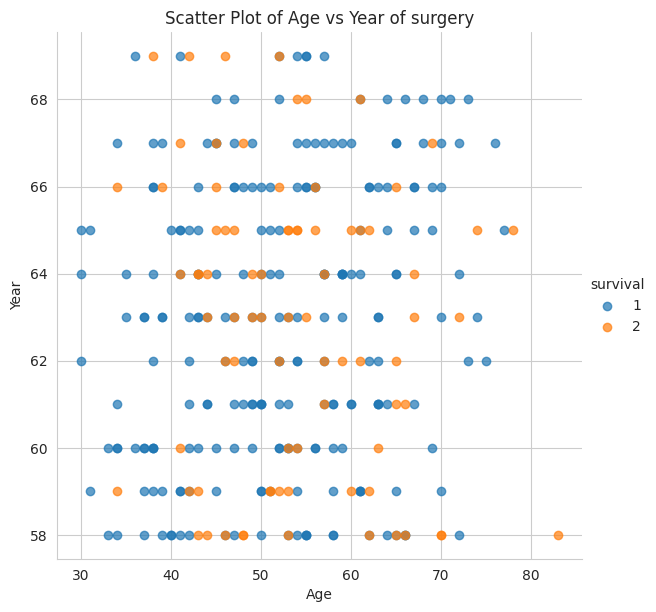

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="survival", height=6) \
   .map(plt.scatter, "Age", "Year", alpha=.7) \
   .add_legend()
plt.title("Scatter Plot of Age vs Year of surgery")
plt.xlabel("Age")
plt.ylabel("Year")
plt.show()

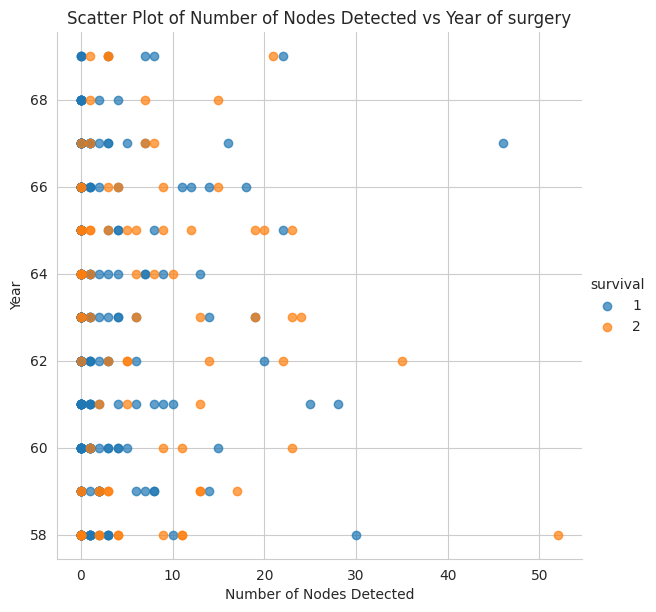

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="survival", height=6) \
   .map(plt.scatter, "Node_num", "Year", alpha=.7) \
   .add_legend()
plt.title("Scatter Plot of Number of Nodes Detected vs Year of surgery")
plt.xlabel("Number of Nodes Detected")
plt.ylabel("Year")
plt.show()

According the pairplot, we determined that number of nodes was the most important feature with respect to the survival status, however, for bivariate analysis, we need 2 features.

From the above pairplot and scatter plot, we can see that age and node_num show some relation with the survival rate.

Although the classes are not distinct, we can see that if the age and node number are less, patient has a more chance of surviving.(this can be observed as the blue points are mostly located towards the bottom of the graph and indicate the survival of the patient.)

Above observations are not seen in age vs year or year vs operation graphs, showing that these combinations of features do not affect the survival status as much.


# Statistical Analysis 

In [ ]:
survived.describe()

,Age,Year,Node_num,survival
count,210.000000,210.000000,210.000000,210.0
mean,51.871429,62.919048,2.985714,1.0
std,11.093239,3.260334,6.029813,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,1.000000,1.0
75%,59.750000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


The above table shows that 210 people of the total patients have survived. The average age of survival is 51 and the average number of nodes is 2.

In [ ]:
passed.describe()

,Age,Year,Node_num,survival
count,79.000000,79.000000,79.000000,79.0
mean,53.886076,62.873418,7.506329,2.0
std,10.203051,3.337307,9.255454,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.500000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.500000,2.0
max,83.000000,69.000000,52.000000,2.0


The above table shows that 79 people of the total patients have not survived. The average age of survival is 62 and the average number of nodes is 7.

# Observations

Following points were observed with respect to the haberman dataset-


1.   The dataset originally consisted of 306 data points out of which 17 were duplicates.
2.   It consisted of 3 independent(age, year, node_num) and 1 dependent variable(survival)
1.   There are 2 classes ,survived(1) and passed(2).
2.   Node_num gives a significant difference in distribution between the survived and passed class, hence chosen for univariate analysis.
1.   On average people that survived had 2 nodes and people that died had 7 nodes.
2.   Some relation of survival status with age and node_num was observed, showing that younger people having less number of nodes have a better chance of surviving.
1.   Out of the total 210 people have survived and 79 people have passed. 
2.   The patients who lived had a mean age of 51.87 years, an SD of 11.09 years, and an average of 2.98 axil nodes found, with an SD of 6.02 years. The patients who did not survive, on the other hand, had a mean age of 53.88 years, a standard deviation of 10.2 years, a mean number of axil nodes found, and a standard deviation of 9.25 years.










To conclude,Node_num is the most important feature for this dataset. Age also some difference in distribution for the survival classes.Hence, these 2 features should be kept in mind when predicting, whether or not a patient will survive for more than 5 years after surgery.